In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline
#mpl.style.use( 'ggplot' )
#plt.style.use('fivethirtyeight')
#sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    # Plot n_samples vs fit_times
    # Plot learning curve
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
# load data
data=pd.read_csv("diamonds.csv")

data.shape

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Features

Carat : Carat weight of the Diamond.  
Cut : Describe cut quality of the diamond.  
Quality in increasing order Fair, Good, Very Good, Premium, Ideal .  
Color : Color of the Diamond.  
With D being the best and J the worst.  
Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.  
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  
Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.  
Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.  
Price : the Price of the Diamond.  
X : Length of the Diamond in mm.  
Y : Width of the Diamond in mm.  
Z : Height of the Diamond in mm.  
Qualitative Features (Categorical) : Cut, Color, Clarity.  ##cut is not a feature but a label (i think) 

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.  

Verify if there are any null values, if so remove the lines with them

In [5]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Check if there are lines with impossible values

In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The features x, y and z have a minimum of 0, which does not make sense

In [7]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Not that many lines, so we will remove them as they wont impact the models significantly

In [8]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [9]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Delete "Unnamed 0" column as it does not have any use, since it only lists the index of each row, which pd does for us

In [10]:
del data['Unnamed: 0']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


For this project, we will choose cut as the label

In [11]:
data.cut.value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

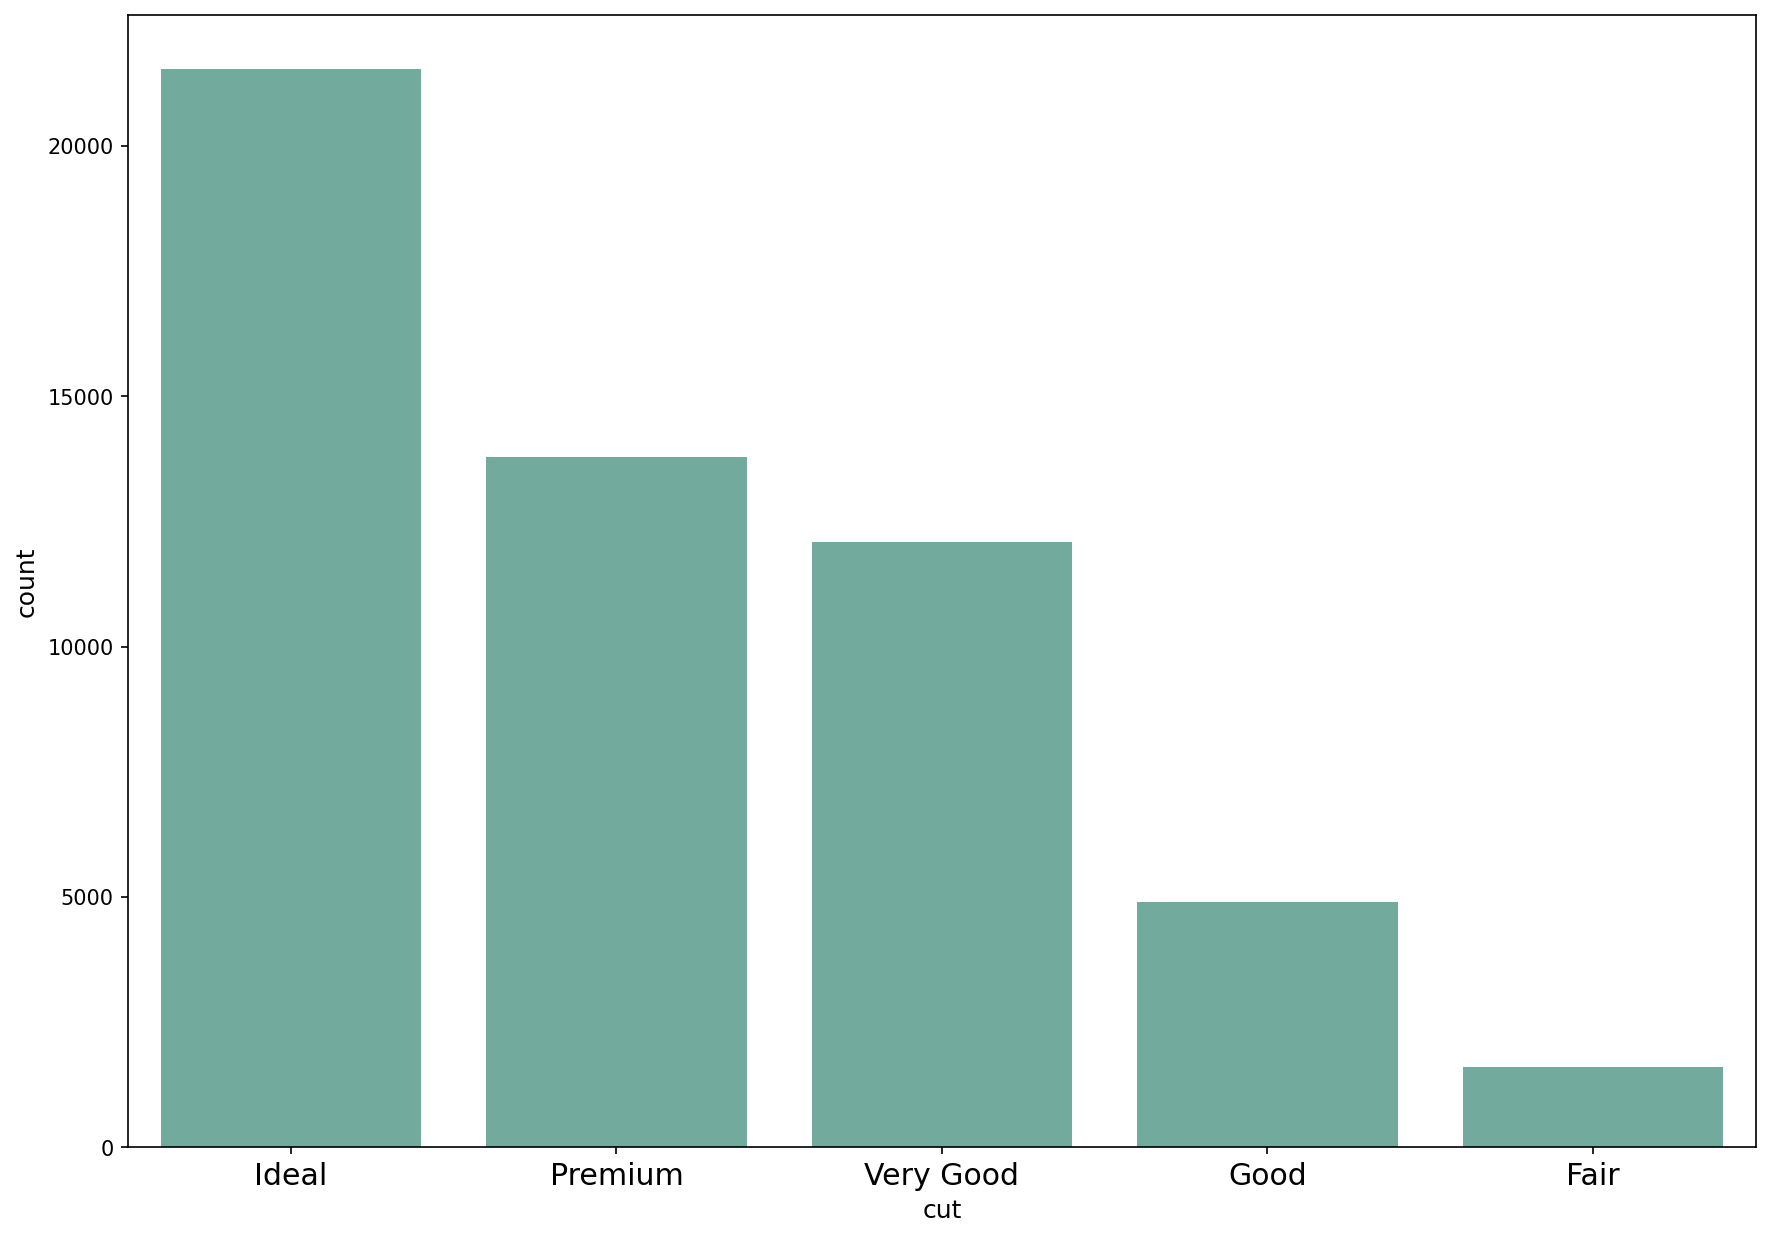

In [37]:
plt.figure(figsize=(14, 10))

sns.countplot(
    x= "cut", 
    data=data, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

Some histograms for every numeric feature

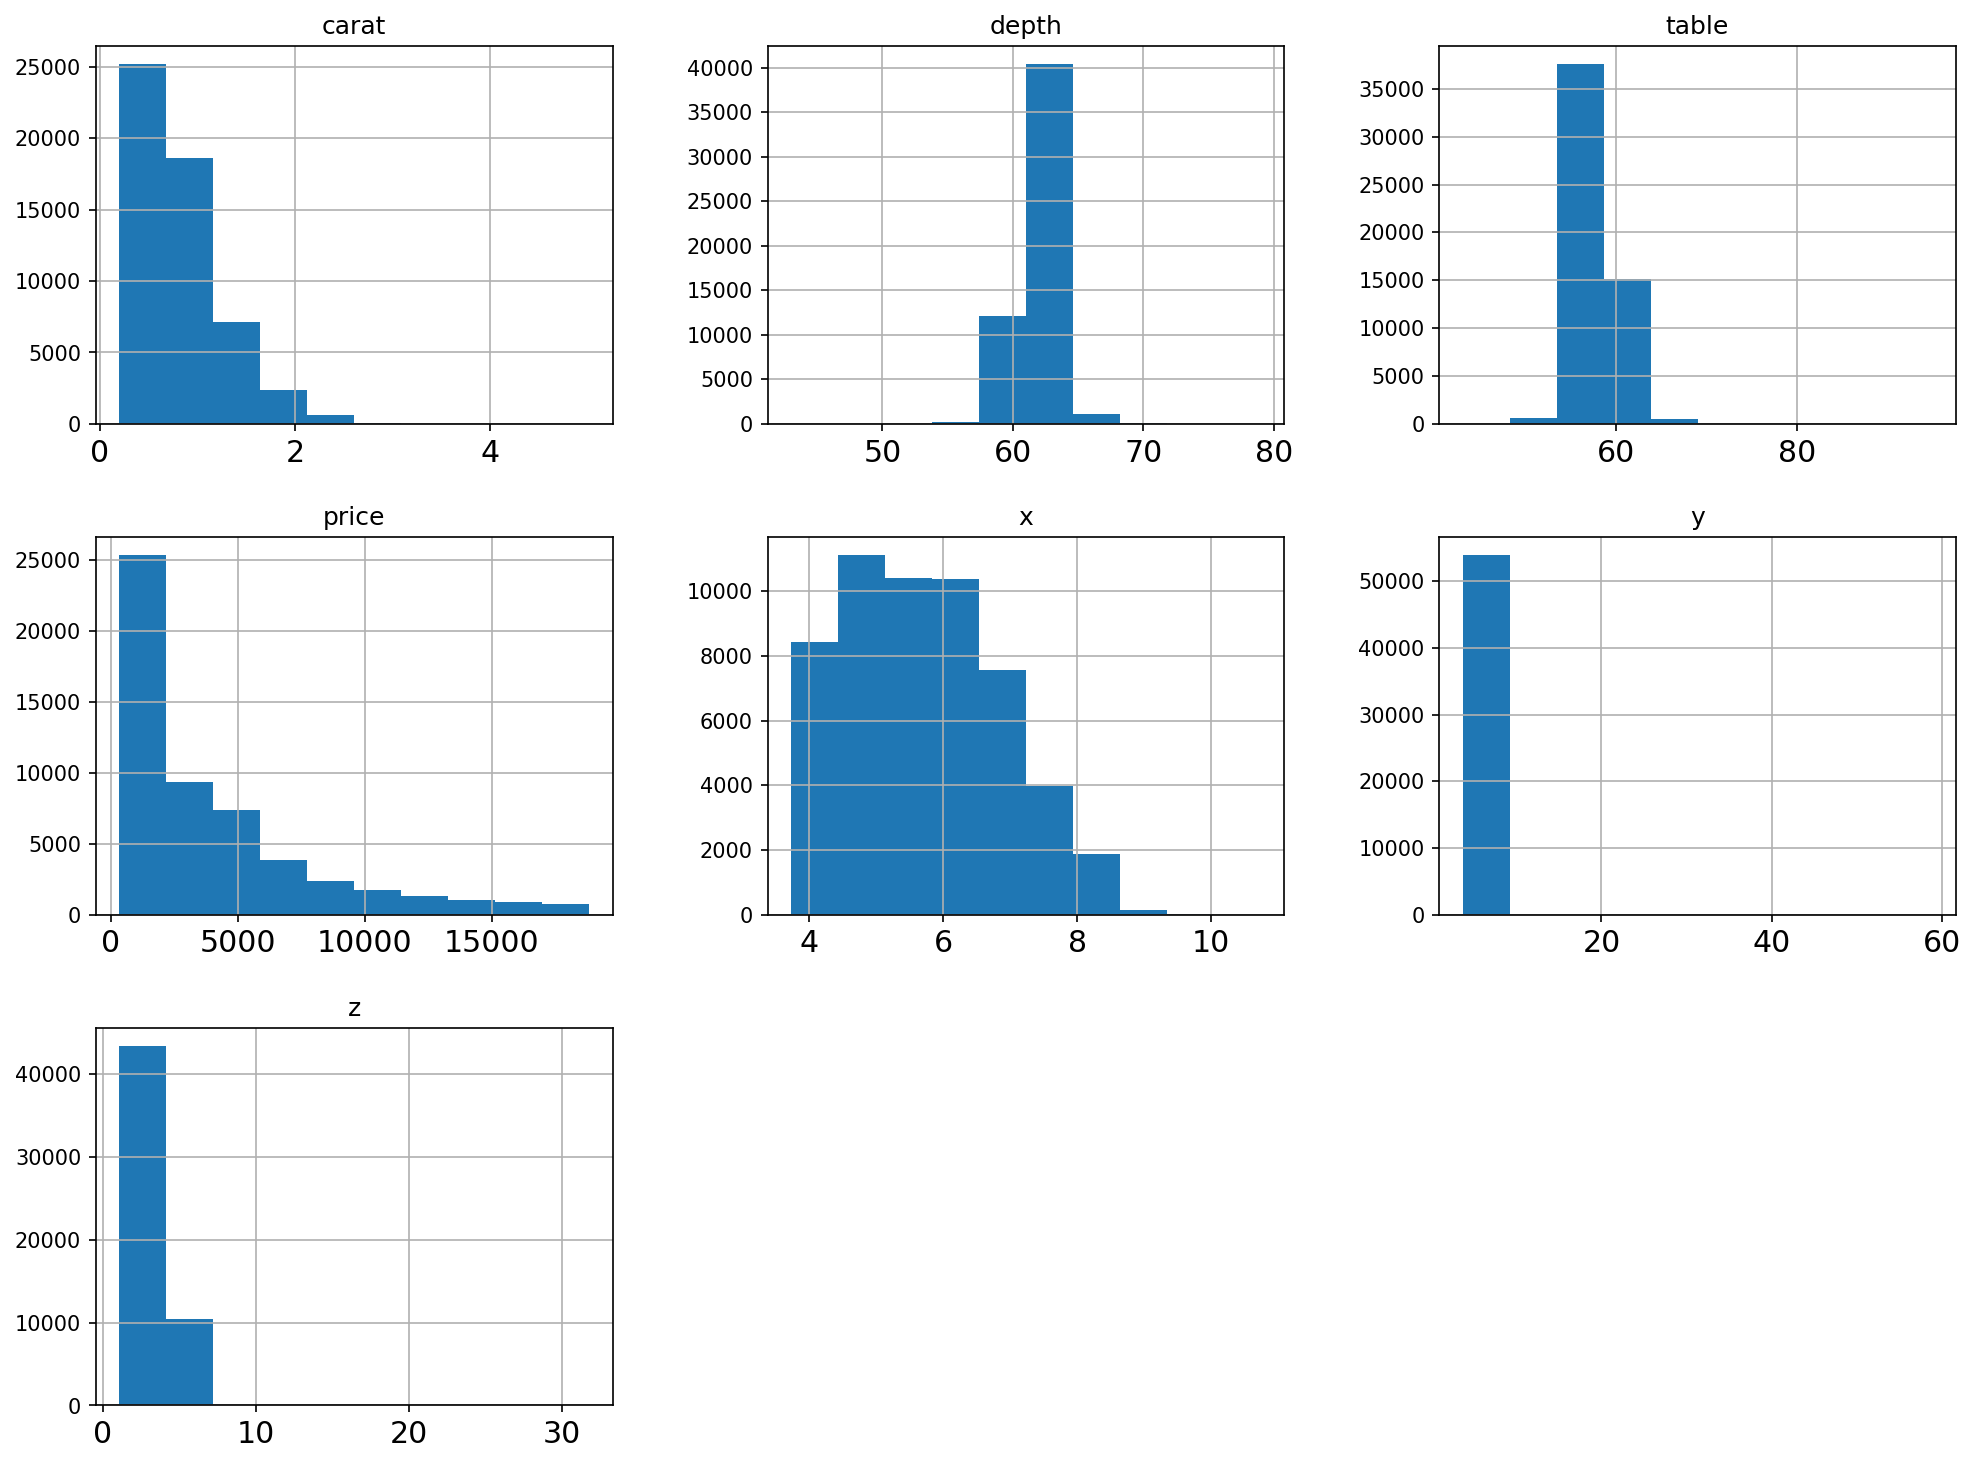

In [12]:
data.hist(figsize=(16, 12));

Both price and carat have skewed distributions, which are distributions where one of the tails is larger than the other. When this happens, we should fix them by using a logarithmic transformer

# Todo
Meter cenas aqui do site externo(Gonçalo)
    criar pipelines dos transformers para cada classifier(acho que temos que retirar 1 ou 2 dos que tinhamos, para ser mais simpels, mas depois ve-se)
    fazer a parte do f1 score e assim do site externo
    fazer a ultima parte do hyperparameter tuning para cada (ou talvez para o melhor apenas?) classifier (nao e so copy paste, e preciso alterar aquilo bastante)

Make the data correlation, to see what features are more dependent on each other

<AxesSubplot:>

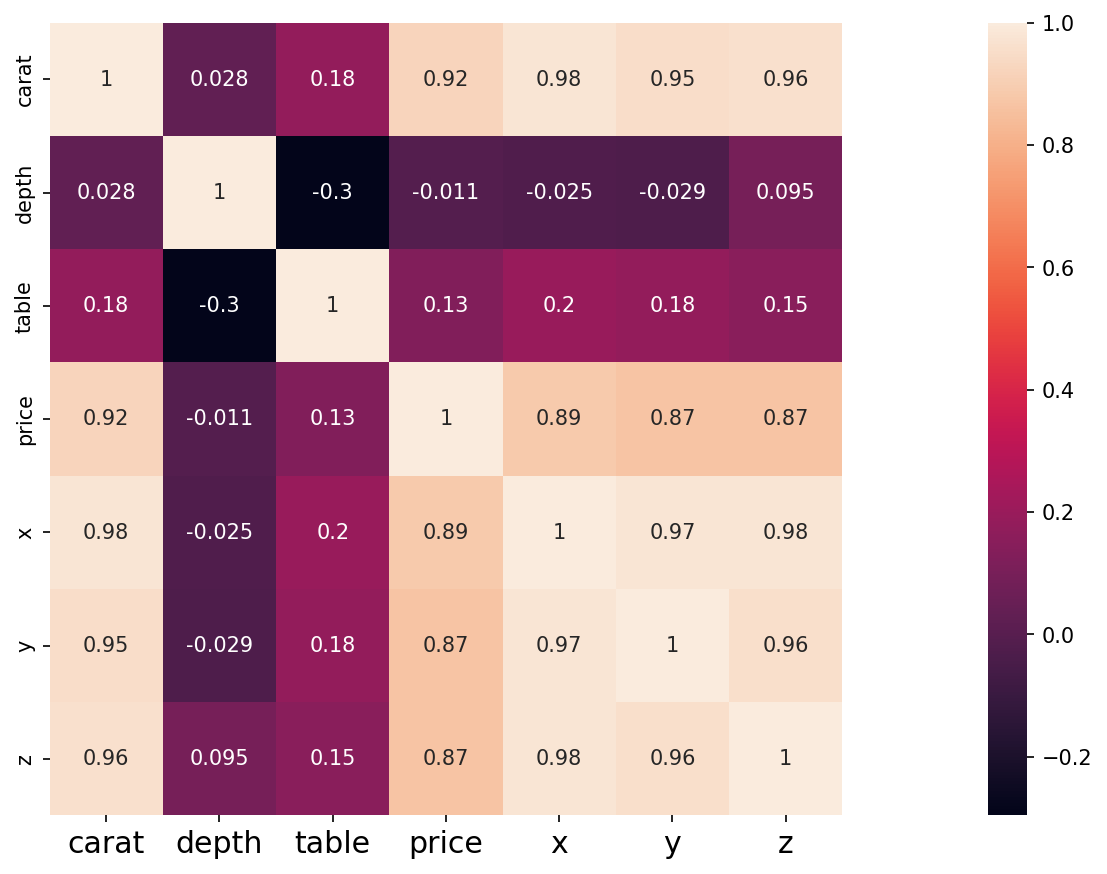

In [13]:
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## barplot of price per cut

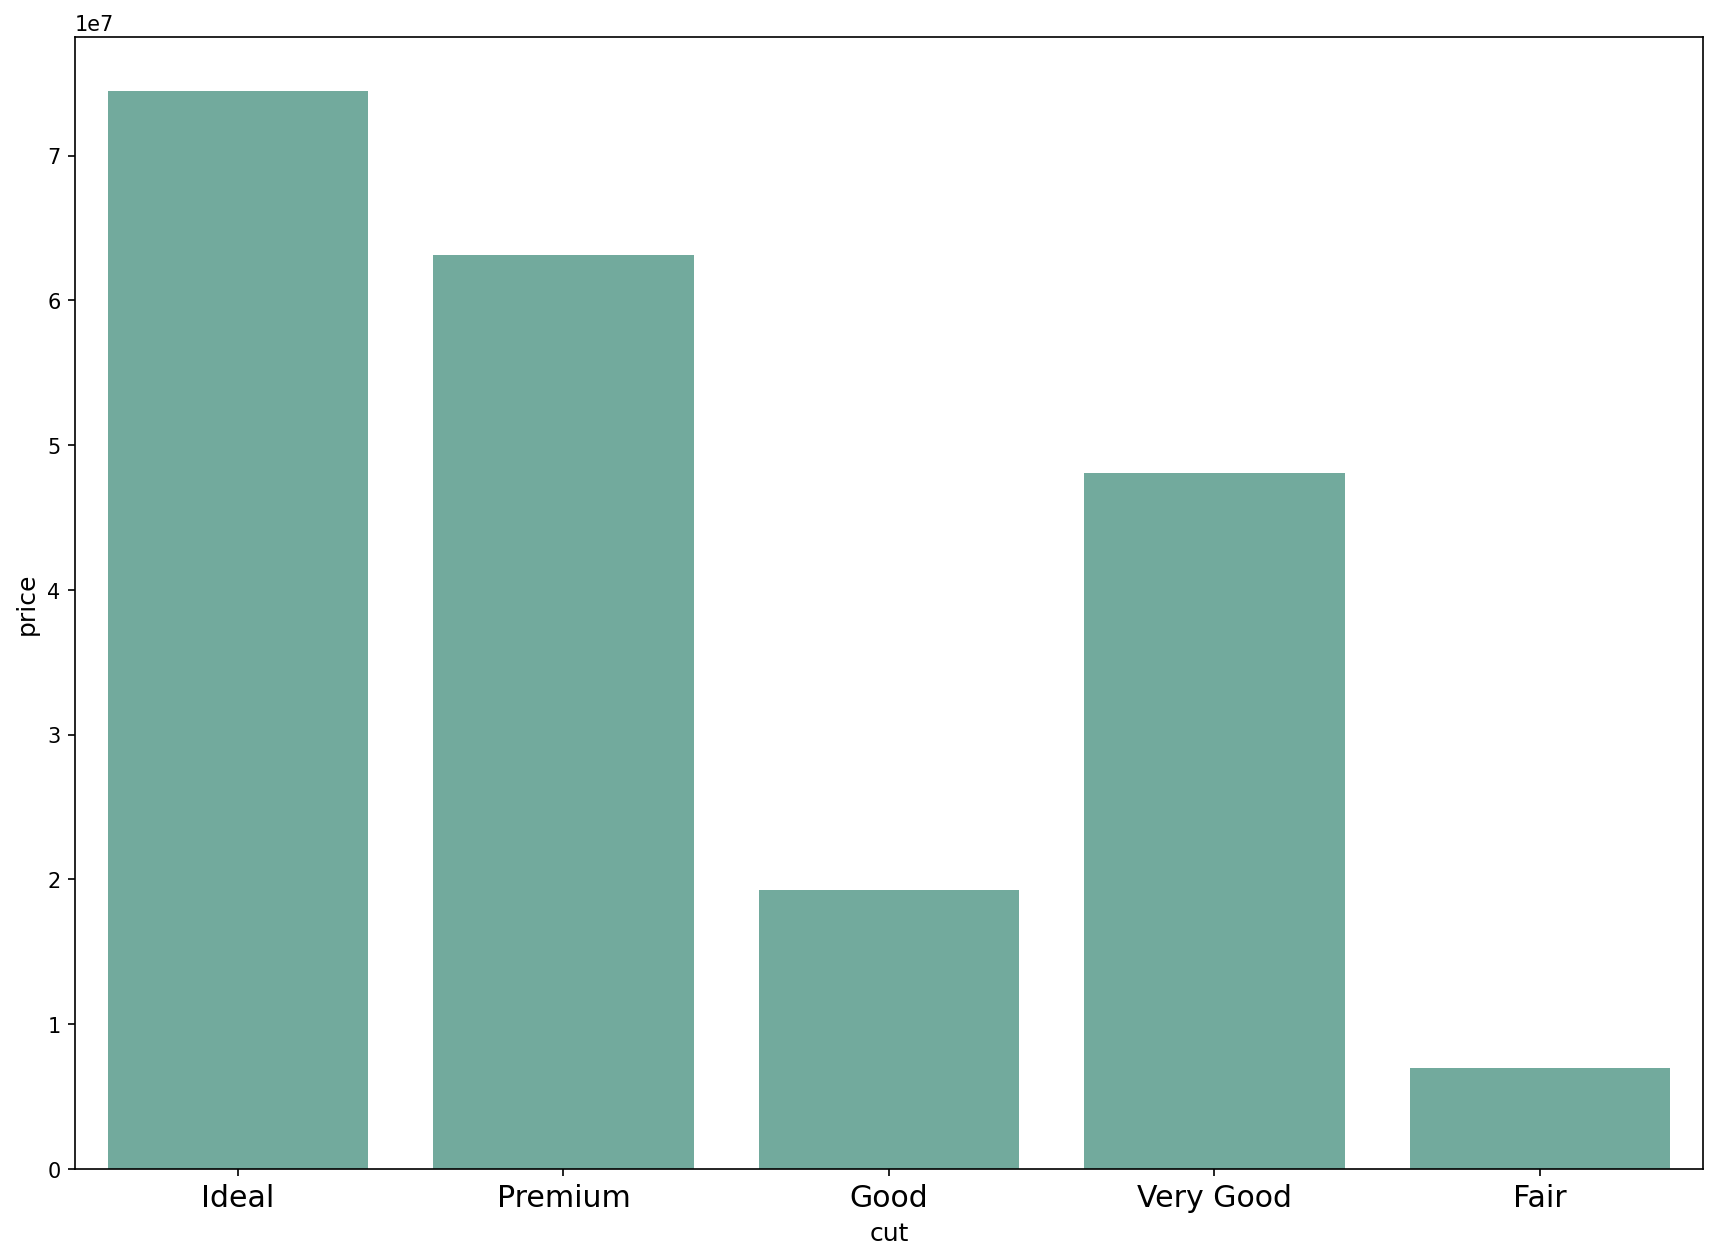

In [14]:


plt.figure(figsize=(14, 10))

sns.barplot(
    y="price", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]

    );

## The better the cut the bigger the price
## jump from good to very good

## barplot of depth per cut

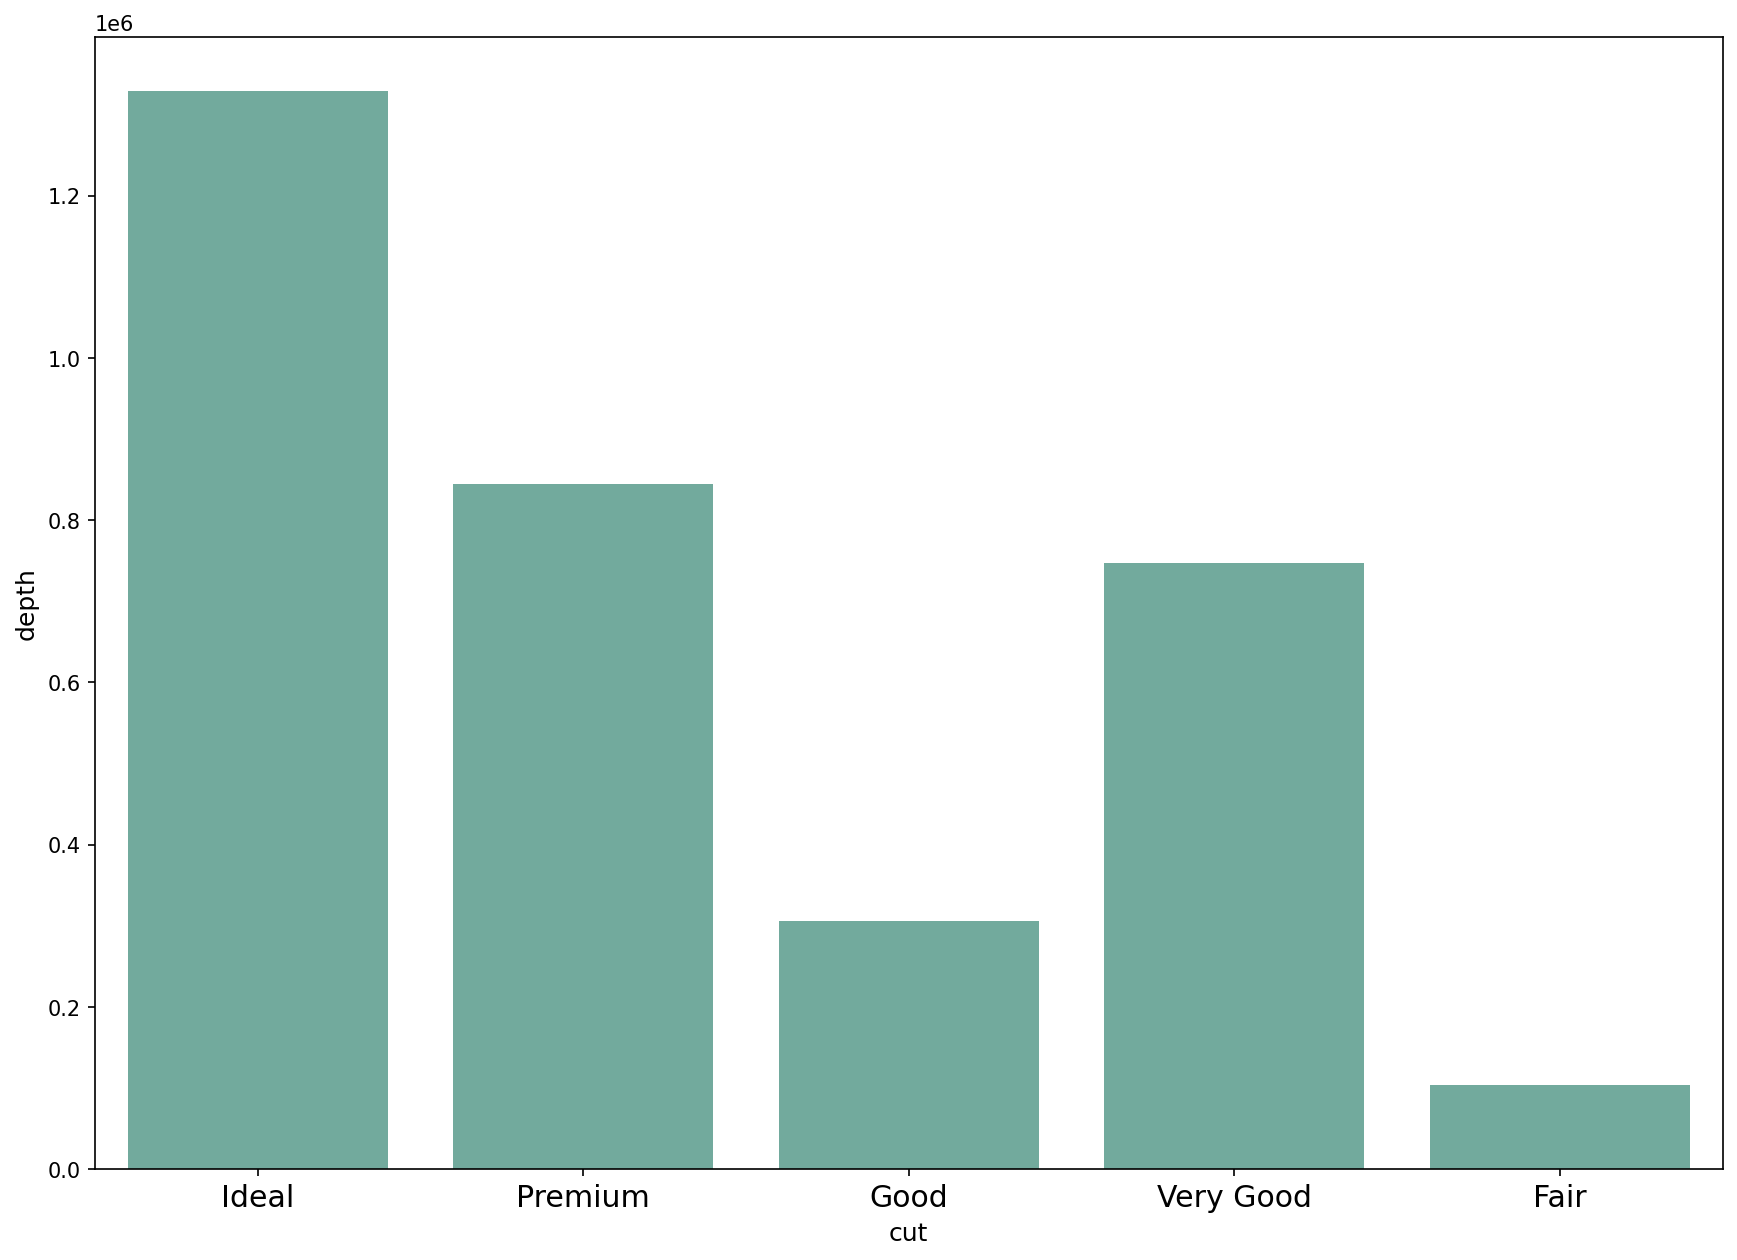

In [18]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="depth", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]

    );

## barplot of carat per cut

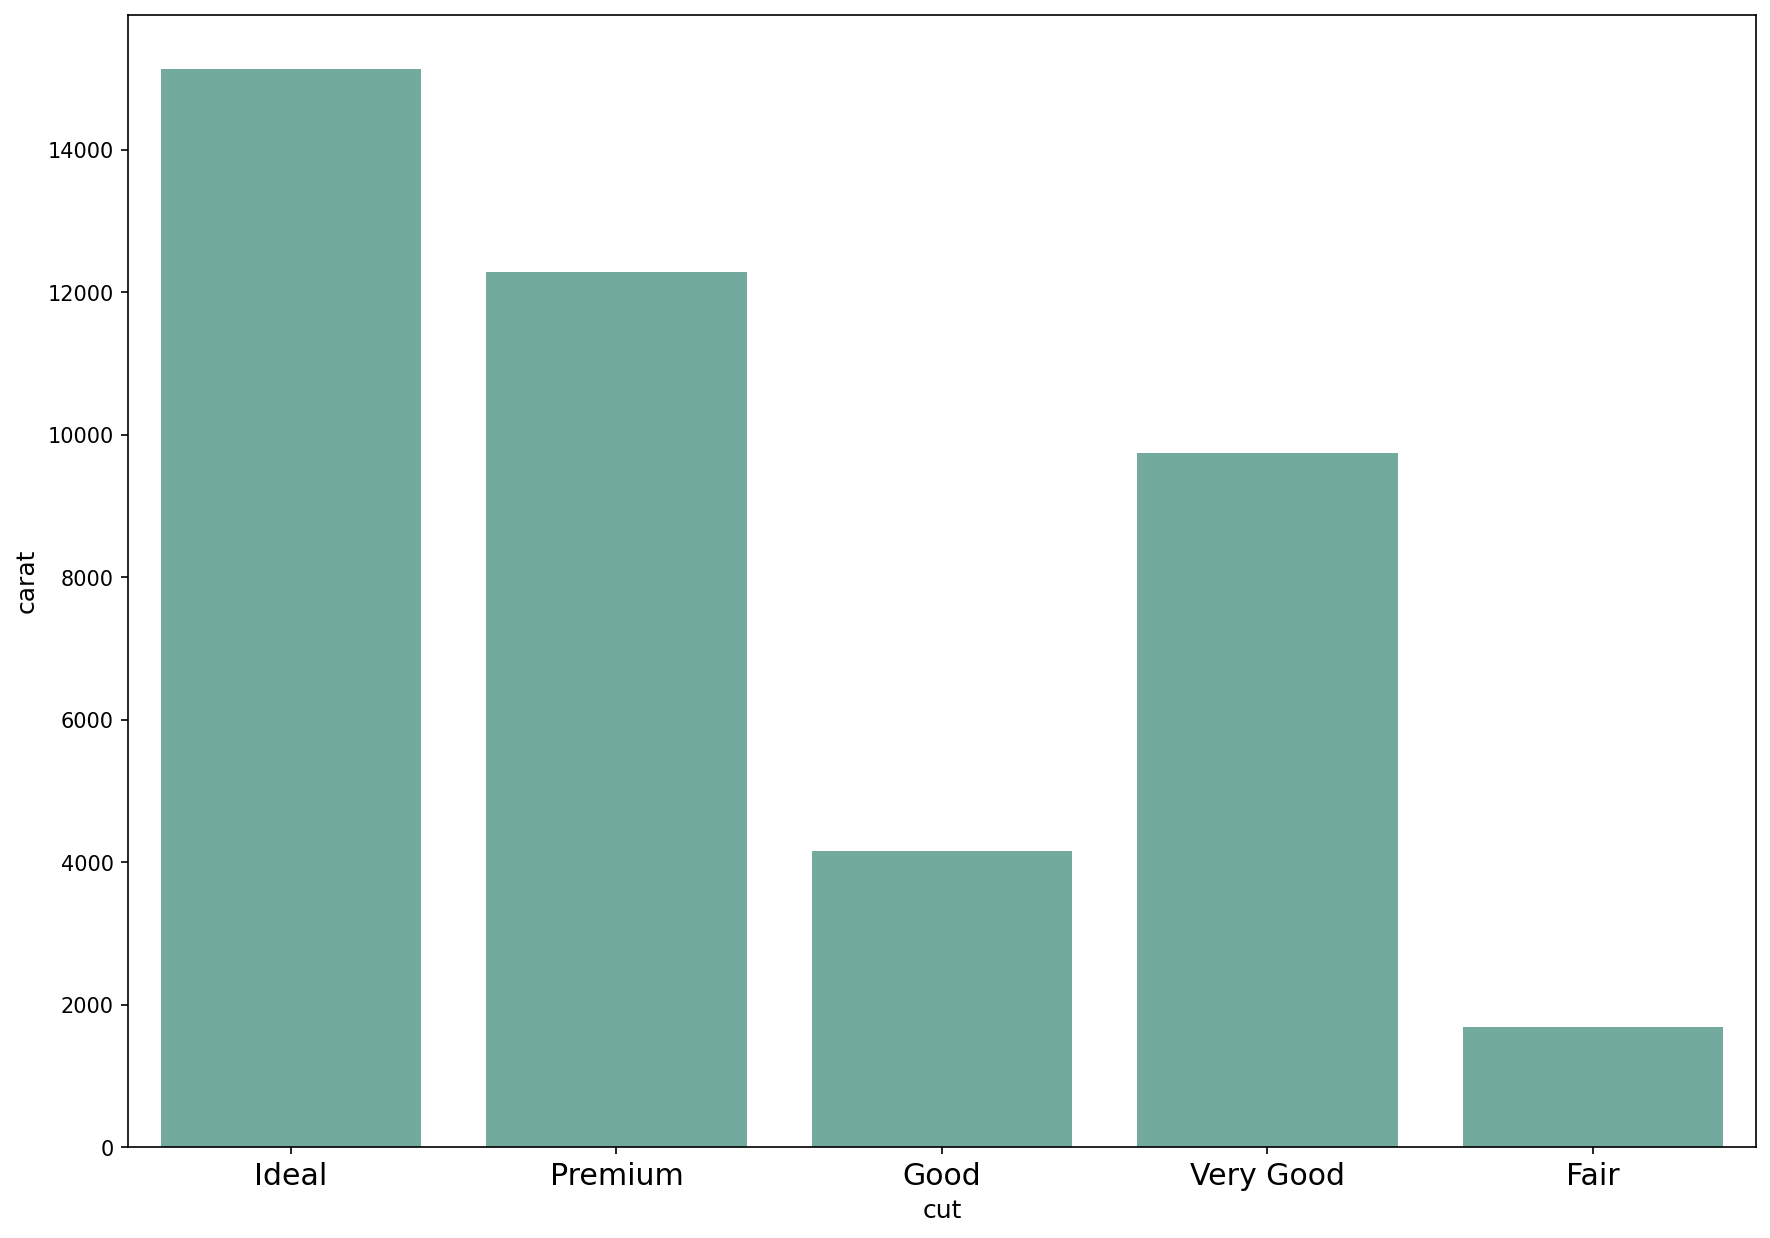

In [19]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="carat", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

## barplot of table per cut

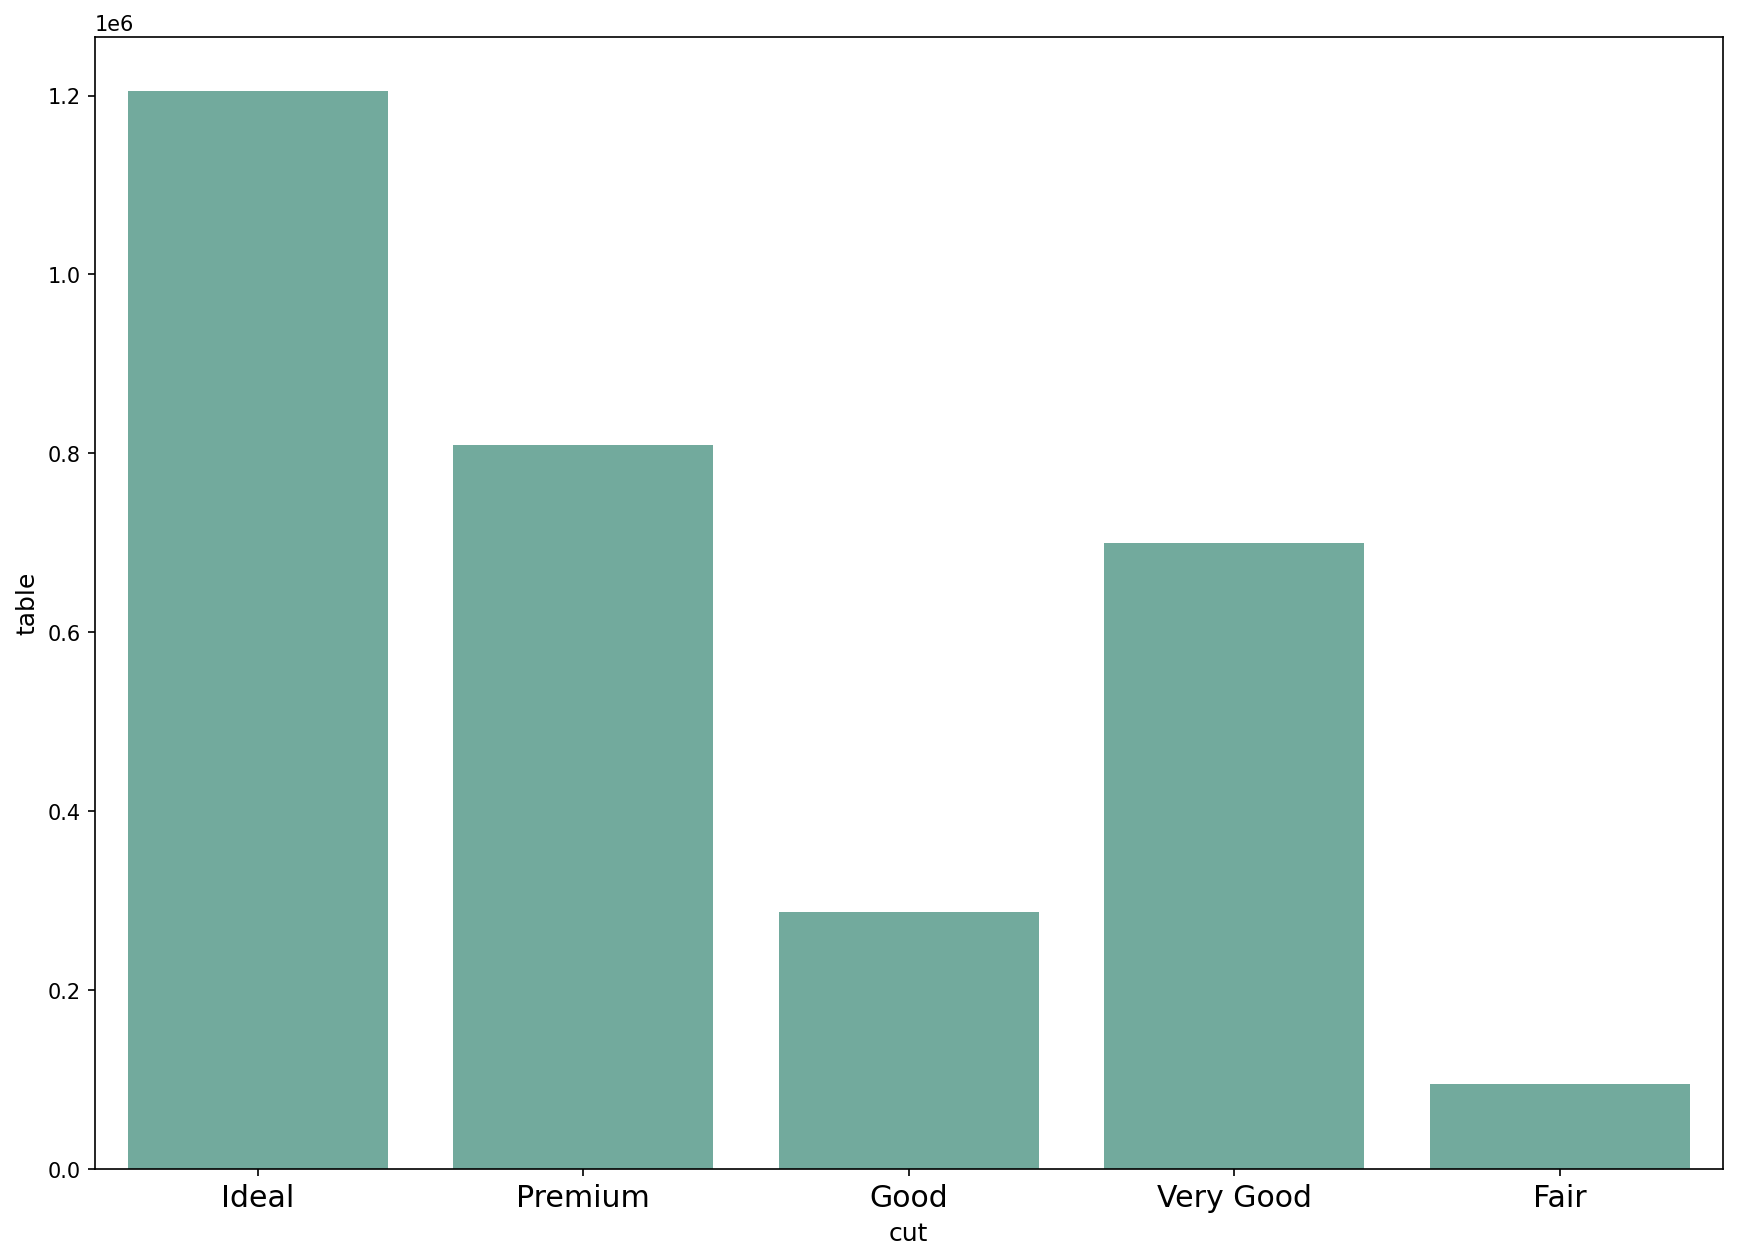

In [20]:
plt.figure(figsize=(14, 10))

sns.barplot(
    y="table", 
    x="cut", 
    data=data, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    order= ["Ideal","Premium","Very Good", "Good", "Fair"]
    );

## boxplot cut and price

<AxesSubplot:xlabel='cut', ylabel='price'>

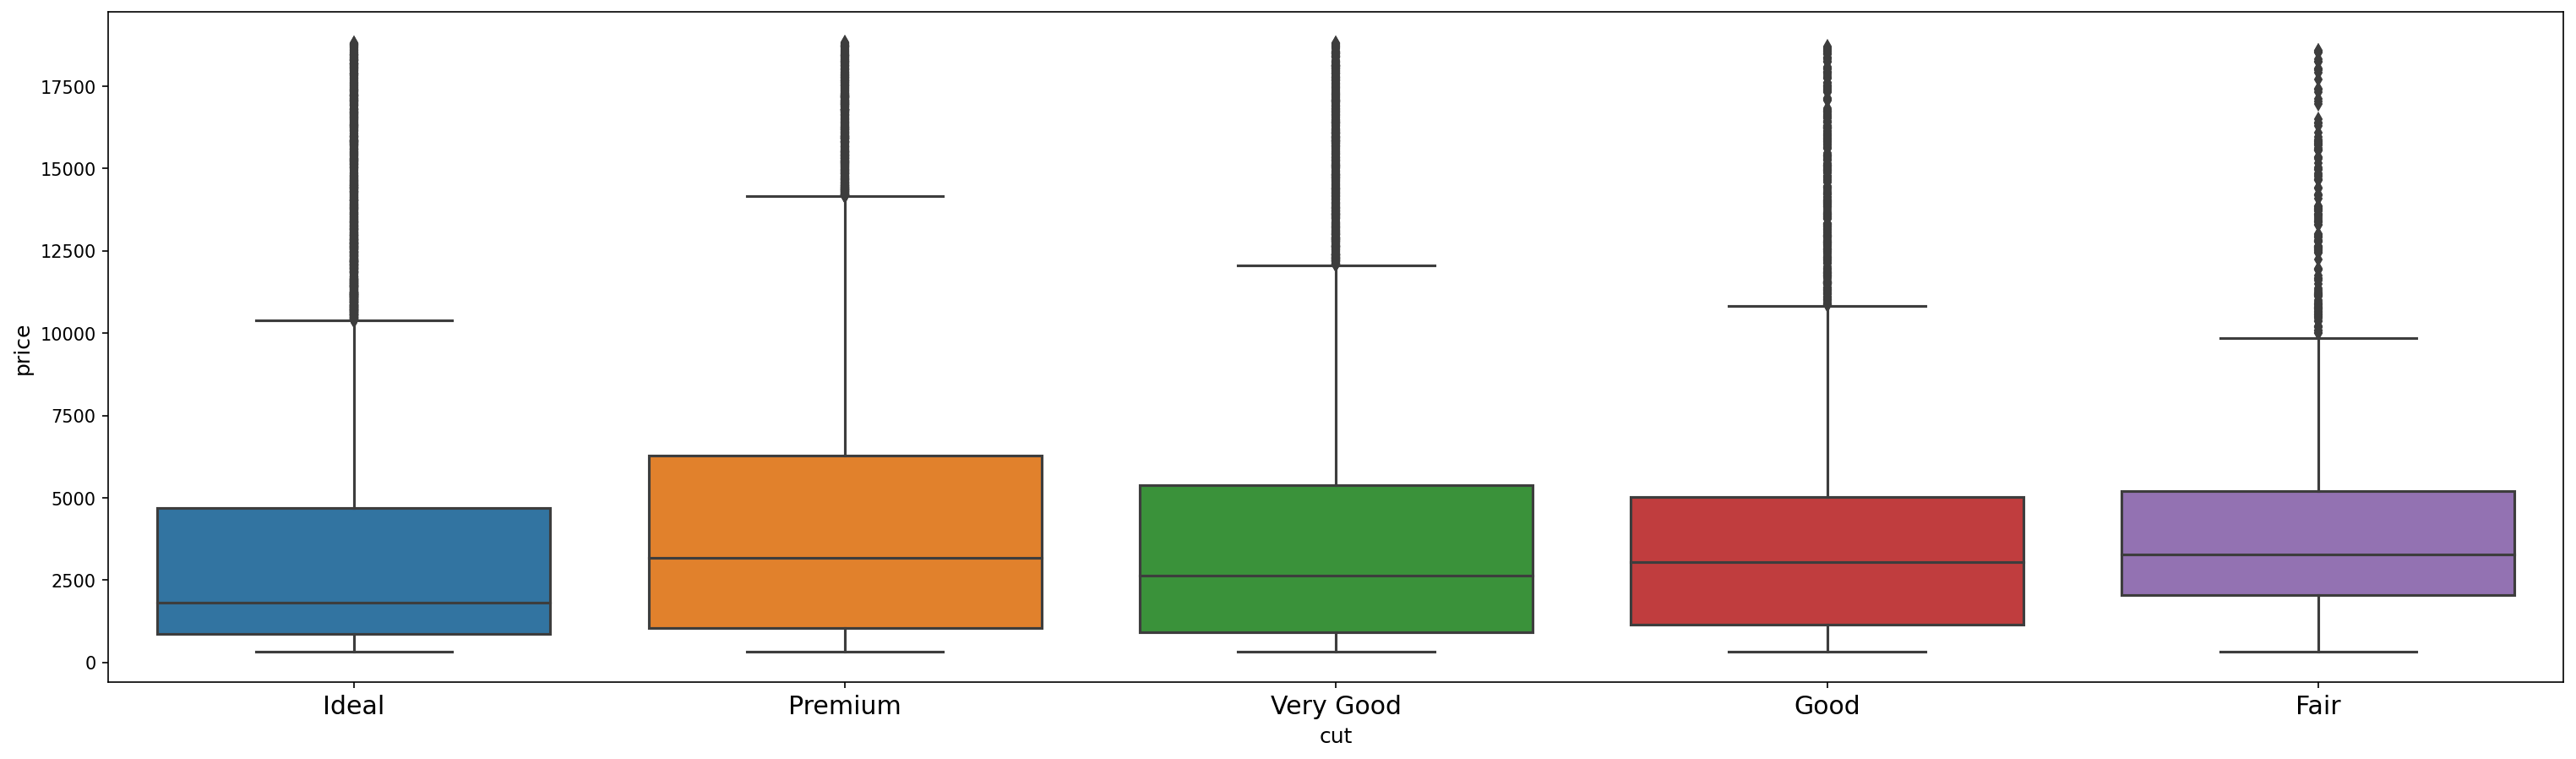

In [38]:
sns.boxplot( 
    x=data["cut"], 
    y=data["price"] ,
    order= ["Ideal","Premium","Very Good", "Good", "Fair"])

## Feature Scalling


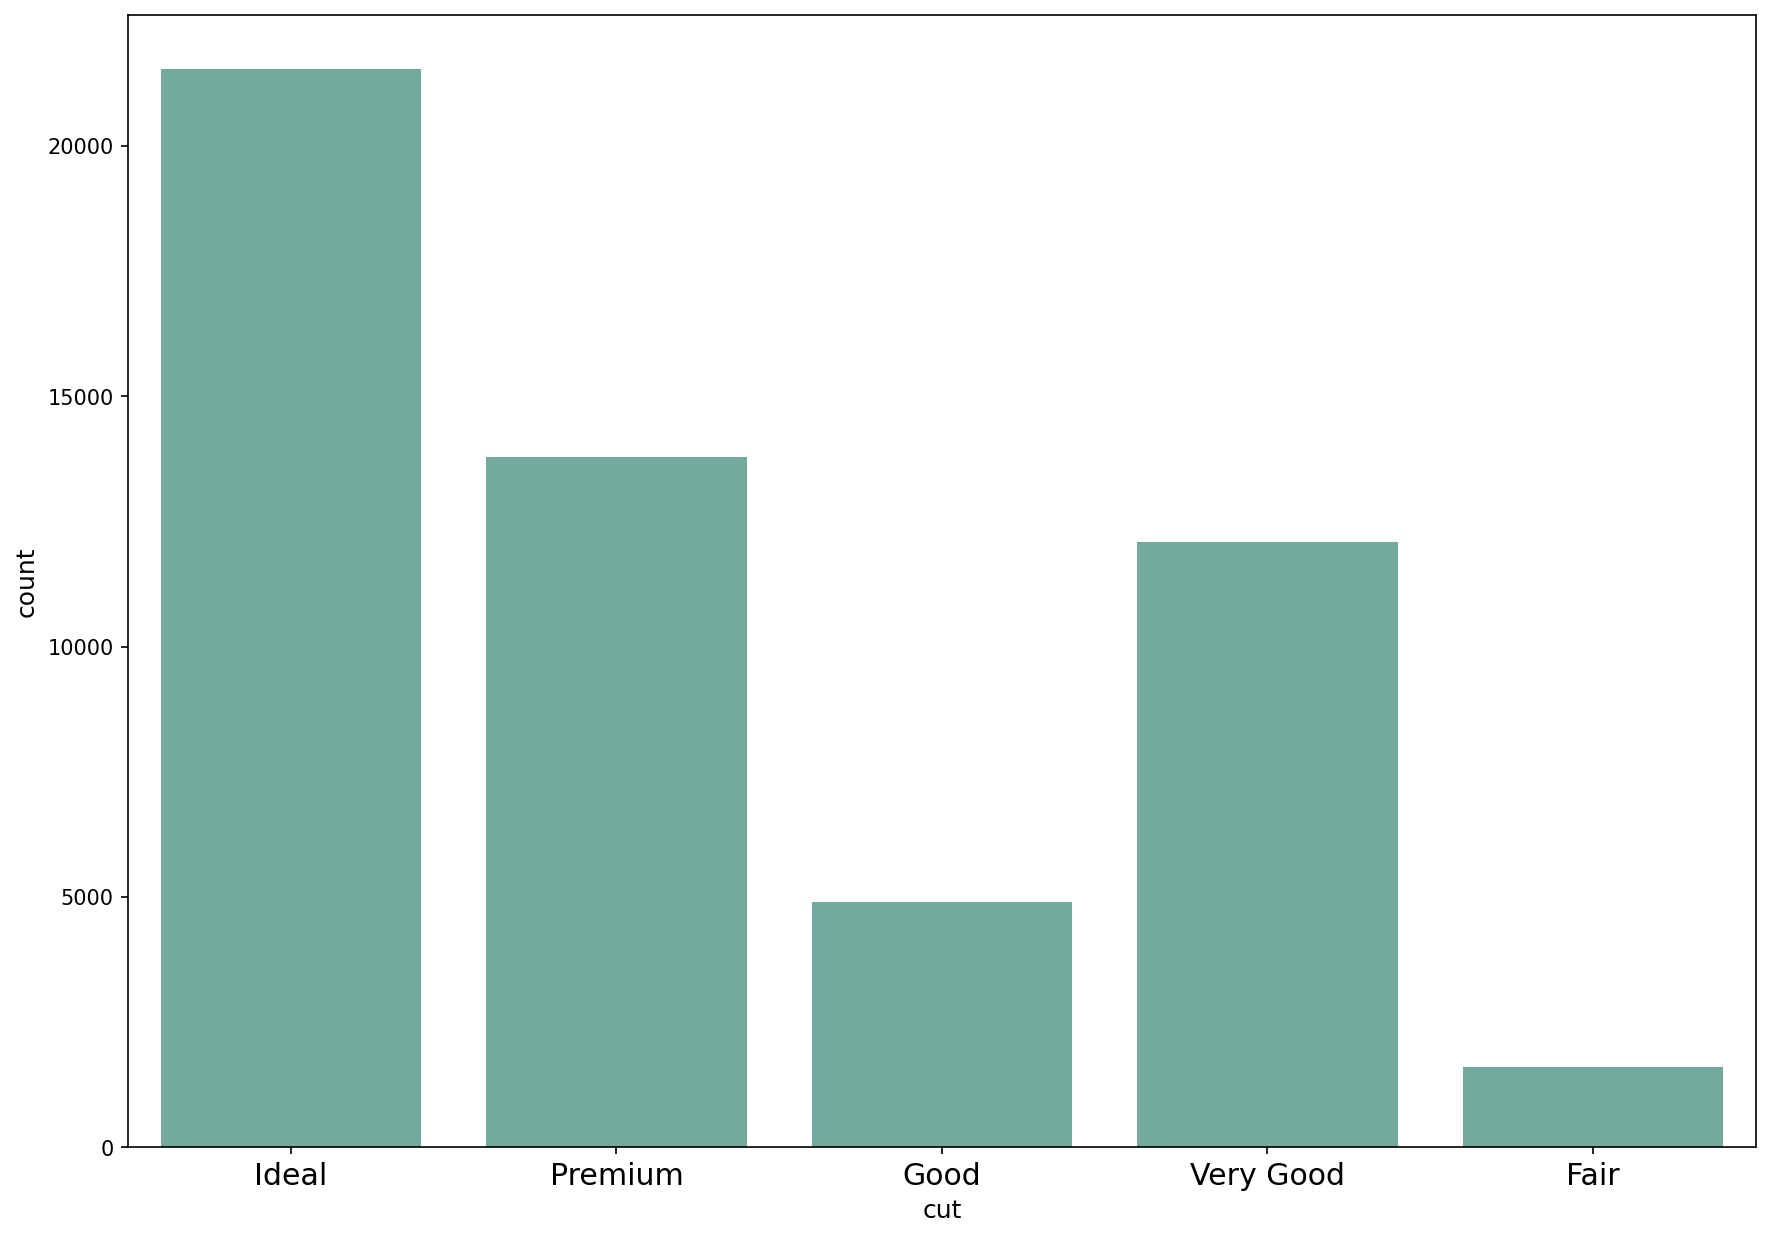

## Native multiclass classifiers

In [14]:
from sklearn.model_selection import train_test_split


# Build a synthetic dataset
X, y = data.drop("cut", axis=1), data["cut"].values.flatten()



# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1121218, test_size=0.33, stratify=y
)


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )

# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown="ignore")
  )

# Build numeric processor
to_log = ["price", "carat"]
to_scale = ["x", "y", "z", "depth", "table"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale),
    ]
)

# Final pipeline combined with RandomForest
randomForest_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            RandomForestClassifier(max_depth=13),
        ),
    ]
)

logReg_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            LogisticRegression(max_iter=2000),
        ),
    ]
)

svm_pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            SVC(kernel = 'linear', C = 1),
        ),
    ]
)
# Fit
_ = randomForest_pipeline.fit(X_train, y_train)
_ = logReg_pipeline.fit(X_train, y_train)
_ = svm_pipeline.fit(X_train, y_train)

## Classes definition

Positive classes: Ideal and Premium diamonds  
Negative classes: Very Good, Good, and Fair diamonds  
True Positives, type 1: actual Ideal, predicted Ideal  
True Positives, type 2: actual Premium, predicted Premium  
True Negatives: the rest of the diamond types predicted correctly  
False Positives: actual value belongs to any of the 3 negative classes but predicted either Ideal or Premium  
False Negatives: actual value is either Ideal or Premium but predicted by any of the 3 negative classes.  

## Random Forest Confusion Matrix and Precision, Recall and F1 scores

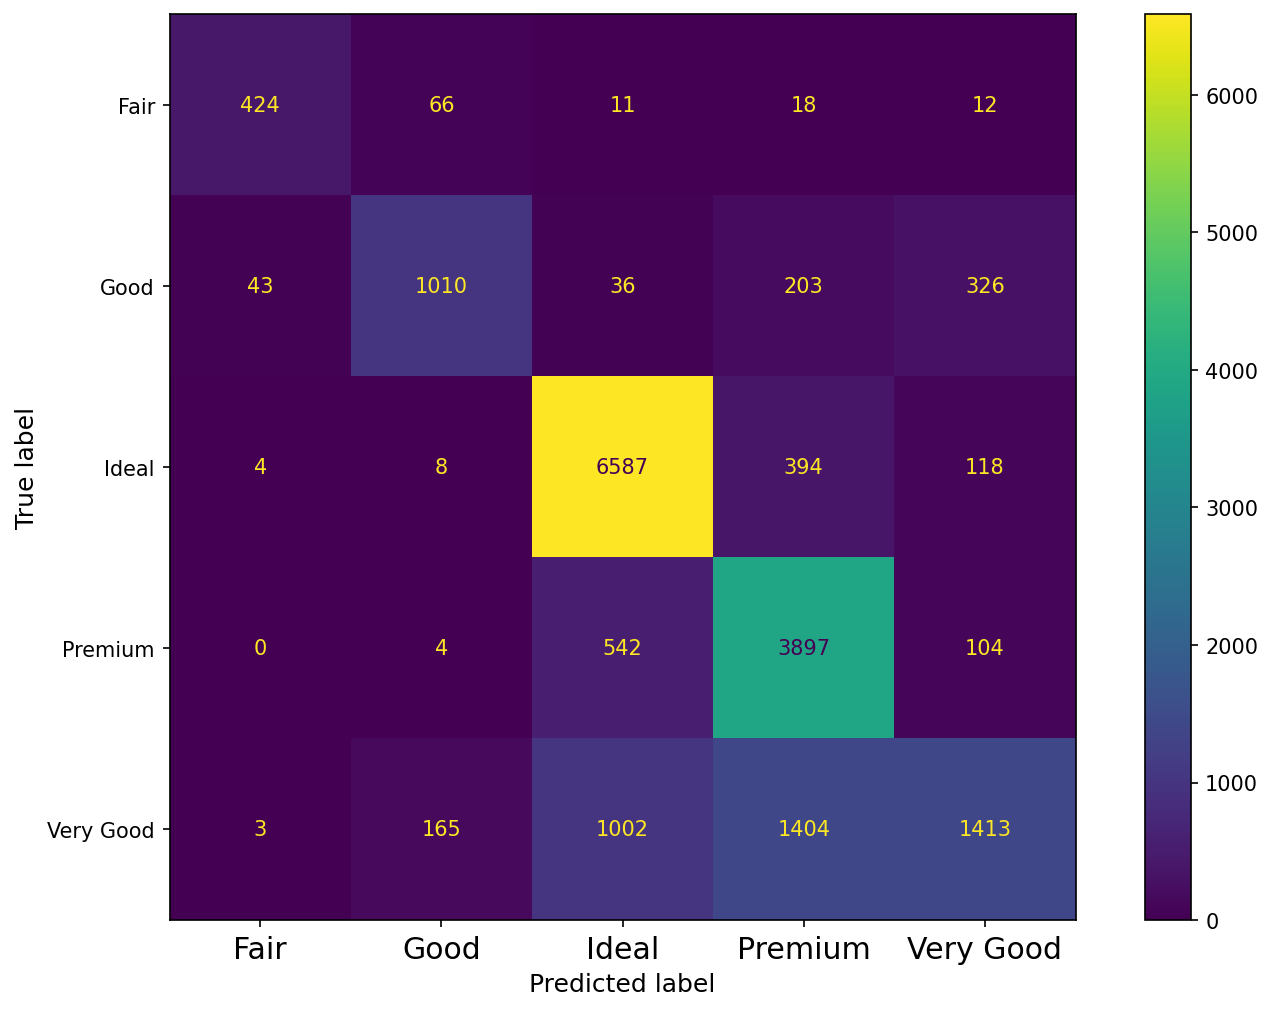

              precision    recall  f1-score   support

        Fair       0.89      0.80      0.84       531
        Good       0.81      0.62      0.70      1618
       Ideal       0.81      0.93      0.86      7111
     Premium       0.66      0.86      0.74      4547
   Very Good       0.72      0.35      0.47      3987

    accuracy                           0.75     17794
   macro avg       0.78      0.71      0.73     17794
weighted avg       0.75      0.75      0.73     17794



In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_randomForest = randomForest_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_randomForest)
cmp = ConfusionMatrixDisplay(cm, display_labels=randomForest_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

print(classification_report(y_test, y_pred_randomForest))

## Logistic Regression Confusion Matrix and Precision, Recall and F1 scores

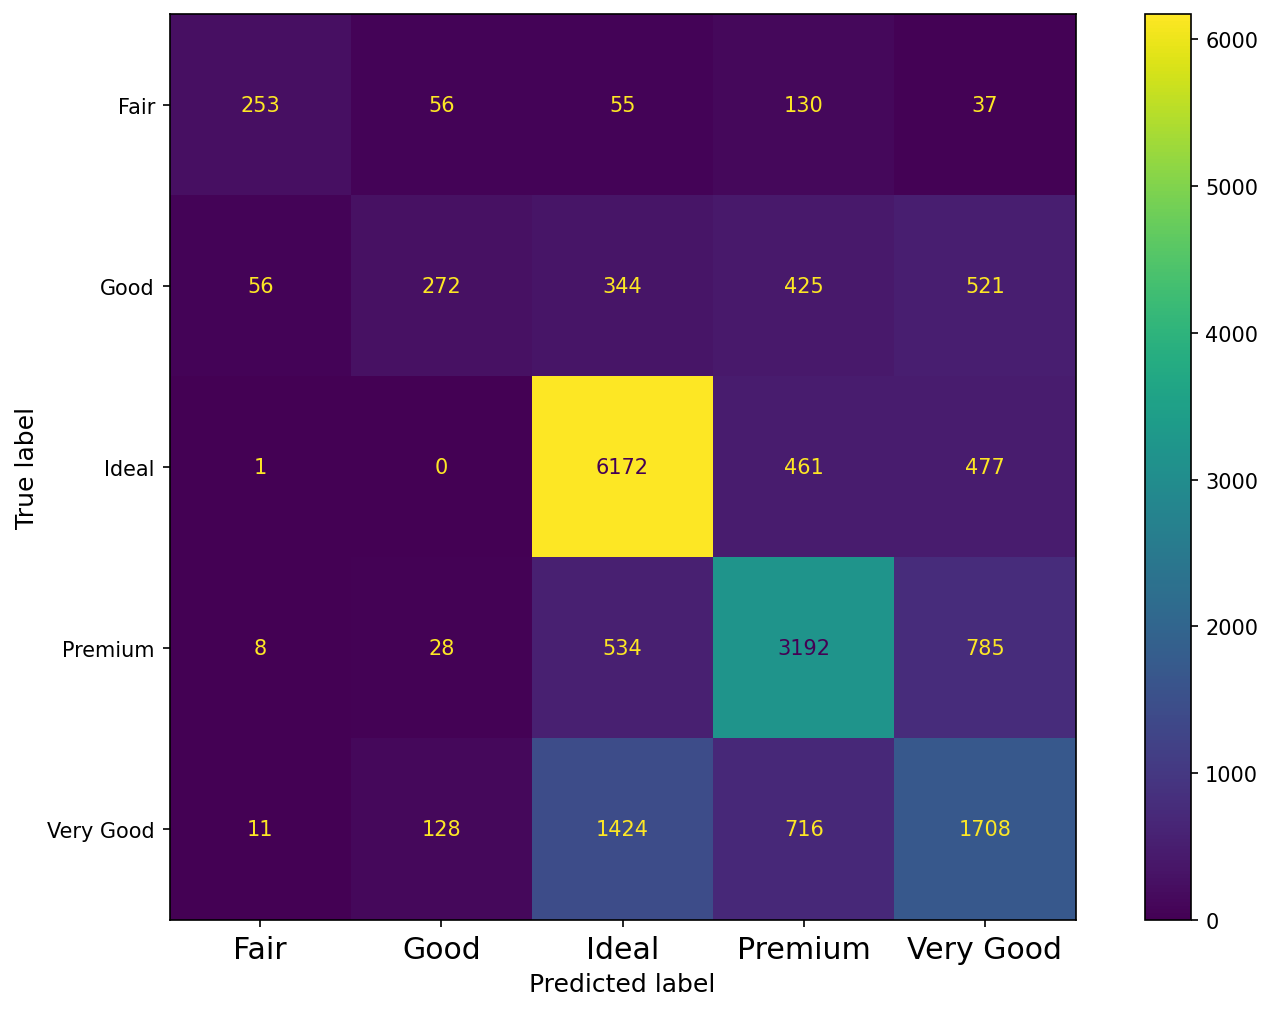

              precision    recall  f1-score   support

        Fair       0.77      0.48      0.59       531
        Good       0.56      0.17      0.26      1618
       Ideal       0.72      0.87      0.79      7111
     Premium       0.65      0.70      0.67      4547
   Very Good       0.48      0.43      0.45      3987

    accuracy                           0.65     17794
   macro avg       0.64      0.53      0.55     17794
weighted avg       0.64      0.65      0.63     17794



In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_logReg = logReg_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_logReg)
cmp = ConfusionMatrixDisplay(cm, display_labels=logReg_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

print(classification_report(y_test, y_pred_logReg))

## SVM Confusion Matrix and Precision, Recall and F1 scores

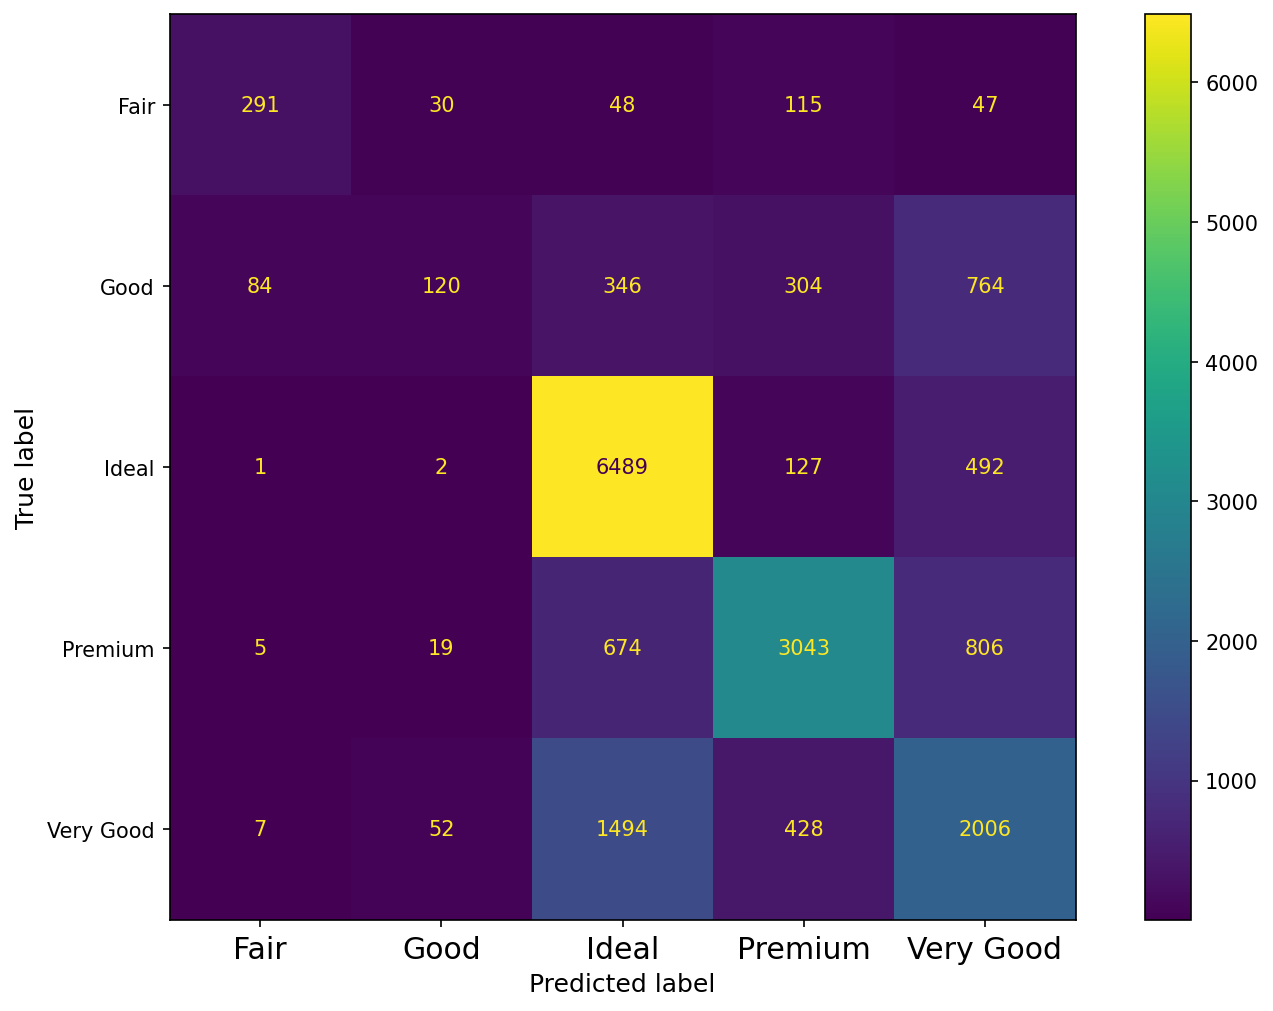

              precision    recall  f1-score   support

        Fair       0.75      0.55      0.63       531
        Good       0.54      0.07      0.13      1618
       Ideal       0.72      0.91      0.80      7111
     Premium       0.76      0.67      0.71      4547
   Very Good       0.49      0.50      0.50      3987

    accuracy                           0.67     17794
   macro avg       0.65      0.54      0.55     17794
weighted avg       0.66      0.67      0.64     17794



In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_svm = svm_pipeline.predict(X_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_svm)
cmp = ConfusionMatrixDisplay(cm, display_labels=svm_pipeline.classes_)
cmp.plot(ax=ax)

plt.show();
print(classification_report(y_test, y_pred_svm))

## Hyperparameter tuning of Random Forest Classifier

In [19]:

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [1, 2, 3, 4]

param_grid = {
    "base__n_estimators": n_estimators,
    "base__max_depth": max_depth,
    "base__min_samples_split": min_samples_split,
    "base__min_samples_leaf": min_samples_leaf,
}

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

custom_f1 = make_scorer(
    f1_score, greater_is_better=True, average="weighted", labels=["Ideal", "Premium"]
  )



In [21]:

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hrs = HalvingRandomSearchCV(
    estimator=randomForest_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)
# Fit
hrs.fit(X, y)

# Score
best_estimator = hrs.best_estimator_
y_preds = best_estimator.predict(X_test)
f1_score(y_test, y_preds, average="weighted", labels=["Ideal", "Premium"])

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1760 is smaller than n_iter=1797. Running 1760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8107770291127628

## Hyperparameter tuning of Logistic Regression

In [22]:
solvers = ['lbfgs']
penalty = ['l2', 'none']
C = np.logspace(-4, 4, 50)

param_grid = {
    "base__solver": solvers,
    "base__penalty": penalty,
    "base__C": C,
}

hrs = HalvingRandomSearchCV(
    estimator=logReg_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)
# Fit
hrs.fit(X, y)

# Score
best_estimator = hrs.best_estimator_
y_preds = best_estimator.predict(X_test)
f1_score(y_test, y_preds, average="weighted", labels=["Ideal", "Premium"])

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 100 is smaller than n_iter=1797. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7464098129272412

## Hyperparameter tuning of SVM

In [25]:
C = np.logspace(-4, 4, 50)
param_grid = {
    "base__C": C,
}

hrs = HalvingRandomSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_grid,
    scoring=custom_f1,
    cv=3,
    n_candidates="exhaust",
    factor=5,
    n_jobs=-1,
)
# Fit
hrs.fit(X, y)

# Score
best_estimator = hrs.best_estimator_
y_preds = best_estimator.predict(X_test)
f1_score(y_test, y_preds, average="weighted", labels=["Ideal", "Premium"])

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 50 is smaller than n_iter=1797. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7671229182698146

## Todo
Daqui de baixo do tuning falta me meter codigo dos graficos mas penso que encontrei aqui nestes links :  
https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv    
https://stackoverflow.com/questions/60553339/how-to-plot-sklearns-gridsearchcv-results-vs-params  
Estes graficos seriam para ver a performance de cada conjunto de parametros para cada modelo  
Penso que ainda falta uma tabela apenas com a f1_score dos 3 classifiers antes e depois do tuning e concluir qual o melhor  